# NYC Traffic Accident

![main](https://cdn-icons-png.flaticon.com/512/91/91684.png)


## Source & Acknowledgements

Observations and advanced EDA can be accessed [here](https://toddwschneider.com/maps/nyc-motor-vehicle-collisions/) for your understanding. Another [site](https://nycdatascience.com/blog/student-works/new-york-city-motor-vehicle-collision-data-visualization/) explains the traffic accident data set in details. This [Kaggle post](https://www.kaggle.com/sveneschlbeck/basic-visualizations) introduces more EDA for references.

### **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Notice that this requires you to download the data form this [link](https://drive.google.com/file/d/1YMcGF1qXSLK7raPp89WVpGrIl6kc5Eq4/view?usp=sharing). Please download the data called *NYC-Accidents-2020*.

Once you download the *csv* format data set from the link above you can save it in your computer locally at a directory you desire. Please upload that data set onto Colab environment by going to the menu bar on the left and click on the *folder* button to open the directory of the notebook. Please directly upload your dataset to this Colab enrivonment and the path defined below should be working fine.

### **Loading Data & Looking At The Details Of The Dataset**

In [ ]:
path = '/content/NYC-Accidents-2020.csv'
data = pd.read_csv(path)
data.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
5,2020-08-29,03:29:00,NaN,NaN,40.682310,-73.844950,POINT (-73.84495 40.68231),WOODHAVEN BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4342721,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
6,2020-08-29,19:30:00,BRONX,10459.0,40.825226,-73.887780,POINT (-73.88778 40.825226),LONGFELLOW AVENUE,EAST 165 STREET,NaN,...,NaN,NaN,NaN,NaN,4343004,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2020-08-29,00:00:00,NaN,NaN,40.800160,-73.935380,POINT (-73.93538 40.80016),2 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4343342,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-08-29,19:50:00,BRONX,10466.0,40.894314,-73.860270,POINT (-73.86027 40.894314),EAST 233 STREET,CARPENTER AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4343030,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
9,2020-08-29,09:20:00,QUEENS,11385.0,40.706780,-73.908880,POINT (-73.90888 40.70678),NaN,NaN,565 WOODWARD AVENUE,...,NaN,NaN,NaN,NaN,4343040,Sedan,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,49134.000000,68935.000000,68935.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,7.488100e+04
mean,10913.681585,40.689825,-73.843376,0.366555,0.001923,0.054740,0.000748,0.043709,0.000120,0.268105,0.001055,4.305762e+06
std,515.069483,1.233368,2.234881,0.726178,0.047609,0.237582,0.027337,0.209737,0.010963,0.691423,0.037073,2.171658e+04
min,10000.000000,0.000000,-74.253006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.063247e+06
25%,10458.000000,40.667076,-73.958680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.287041e+06
50%,11210.000000,40.716885,-73.916850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.305812e+06
75%,11354.000000,40.789445,-73.862630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324545e+06
max,11697.000000,40.912884,0.000000,15.000000,4.000000,6.000000,1.000000,3.000000,1.000000,15.000000,4.000000,4.343622e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [ ]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

## EDA

Start with some basic things:
- View dimensions of dataset
- Preview the dataset
- View column names
- View statistical properties of dataset
- Check for missing values | if yes, how to clean up missing values?
- View the frequency distribution of values
- Missing values in categorical variables

In [ ]:
# Shape Of Data Before Split
data.shape

(74881, 29)

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


### **Data Cleaning & Removing Unrequired Columns**

In [ ]:
# Dropping All Of The Data We Did Not Desire To Keep
data = data.drop(['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED',
       'COLLISION_ID', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'ZIP CODE', 'LOCATION'], axis = 1)
# Checking Whether The Dropped Columns Were Actually Removed
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
# Dropping All Rows With NaN Values In Borough, Latitude, & Longitude Columns
data = data.dropna(subset=['BOROUGH', 'LATITUDE', 'LONGITUDE'])

In [ ]:
# Checking If The Rows With NaN Values Were Dropped
np.sum(data.isna(), axis = 0)

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
LATITUDE                             0
LONGITUDE                            0
NUMBER OF PERSONS INJURED            0
CONTRIBUTING FACTOR VEHICLE 1      229
CONTRIBUTING FACTOR VEHICLE 2    10629
CONTRIBUTING FACTOR VEHICLE 3    43900
CONTRIBUTING FACTOR VEHICLE 4    46648
CONTRIBUTING FACTOR VEHICLE 5    47421
VEHICLE TYPE CODE 1                475
VEHICLE TYPE CODE 2              14679
VEHICLE TYPE CODE 3              44108
VEHICLE TYPE CODE 4              46690
VEHICLE TYPE CODE 5              47427
dtype: int64

In [ ]:
# Converting Crash Date To Have Only The Month
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH DATE'] = data['CRASH DATE'].dt.month

# Converting Crash Time To Have Only The Hour
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'])
data['CRASH TIME'] = data['CRASH TIME'].dt.hour

# Renaming CRASH TIME & DATE Columns
data = data.rename(columns={"CRASH TIME": "CRASH HOUR", "CRASH DATE": "CRASH MONTH"}, errors="raise")

# Display the modified data
data.head()

,CRASH MONTH,CRASH HOUR,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,8,15,BRONX,40.892100,-73.833760,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,8,21,BROOKLYN,40.690500,-73.919914,2,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
3,8,0,BRONX,40.824720,-73.892960,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,8,17,BROOKLYN,40.649890,-73.933890,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
6,8,19,BRONX,40.825226,-73.887780,0,Unspecified,NaN,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [ ]:
# Utilizing The Vehicle Type Code 1-5 Columns To Create A New Columns With The Number Of Vehicles In The Accident
vehi = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
data['NUMBER VEHI'] = len(vehi) - data[vehi].isna().sum(axis=1)
# Checking How Many Rows Are In The New Column
len(data['NUMBER VEHI'])

47746

In [ ]:
# Checking If The Proper Info Is In The New Column
data['NUMBER VEHI']

0        2
1        2
3        4
4        2
6        1
        ..
74876    1
74877    3
74878    2
74879    2
74880    2
Name: NUMBER VEHI, Length: 47746, dtype: int64

In [ ]:
vehi = ['CONTRIBUTING FACTOR VEHICLE 1',
             'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
             'CONTRIBUTING FACTOR VEHICLE 5']

data['NUMBER CONT'] = len(vehi) - data[vehi].isna().sum(axis=1)
len(data['NUMBER CONT'])

47746

In [ ]:
data['NUMBER CONT']

0        2
1        2
3        4
4        2
6        1
        ..
74876    1
74877    3
74878    2
74879    2
74880    2
Name: NUMBER CONT, Length: 47746, dtype: int64

In [ ]:
np.corrcoef(data['NUMBER CONT'],data['NUMBER VEHI']  )

array([[1.       , 0.8780204],
       [0.8780204, 1.       ]])

In [ ]:
data

,CRASH MONTH,CRASH HOUR,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER VEHI,NUMBER CONT
0,8,15,BRONX,40.892100,-73.833760,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,2
1,8,21,BROOKLYN,40.690500,-73.919914,2,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2,2
3,8,0,BRONX,40.824720,-73.892960,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN,4,4
4,8,17,BROOKLYN,40.649890,-73.933890,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2,2
6,8,19,BRONX,40.825226,-73.887780,0,Unspecified,NaN,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74876,1,15,BRONX,40.826810,-73.896510,0,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,1,1
74877,1,8,BROOKLYN,40.582935,-73.959210,0,Passing Too Closely,Unspecified,Unspecified,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,3,3
74878,1,11,BRONX,40.848553,-73.830055,0,Unspecified,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN,2,2
74879,1,1,MANHATTAN,40.753624,-73.969440,0,Passing or Lane Usage Improper,Driver Inattention/Distraction,NaN,NaN,NaN,Sedan,Taxi,NaN,NaN,NaN,2,2


Throughout our data, we can see that the data was gathered in an unprofessional manner as the information is very repetitive. For example, the ambulance category is repeated numerous times but with slightly different names


In [ ]:
# Storing The Discontinuous Data To Another Data Variable
OHE_data = data[['BOROUGH']]
# Removing Discontinous Data From Main Data Variable
data = data[['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER VEHI', 'CRASH HOUR', 'CRASH MONTH', 'NUMBER CONT']]
# Displaying Discontinous Data
data.head()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT
0,40.892100,-73.833760,0,2,15,8,2
1,40.690500,-73.919914,2,2,21,8,2
3,40.824720,-73.892960,0,4,0,8,4
4,40.649890,-73.933890,0,2,17,8,2
6,40.825226,-73.887780,0,1,19,8,1


In [ ]:
# One Hot Encoding The Vehicle Data
OHE_data = pd.get_dummies(OHE_data)
OHE_data.head()

,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,1,0,0,0,0
1,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
6,1,0,0,0,0


In [ ]:
# Concatenating The One Hot Encoded Vehicle Types With Other Data
data = pd.concat([data, OHE_data], axis=1)
data.head()
data.columns

Index(['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER VEHI',
       'CRASH HOUR', 'CRASH MONTH', 'NUMBER CONT', 'BOROUGH_BRONX',
       'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN', 'BOROUGH_QUEENS',
       'BOROUGH_STATEN ISLAND'],
      dtype='object')

In [ ]:
data

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,40.892100,-73.833760,0,2,15,8,2,1,0,0,0,0
1,40.690500,-73.919914,2,2,21,8,2,0,1,0,0,0
3,40.824720,-73.892960,0,4,0,8,4,1,0,0,0,0
4,40.649890,-73.933890,0,2,17,8,2,0,1,0,0,0
6,40.825226,-73.887780,0,1,19,8,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74876,40.826810,-73.896510,0,1,15,1,1,1,0,0,0,0
74877,40.582935,-73.959210,0,3,8,1,3,0,1,0,0,0
74878,40.848553,-73.830055,0,2,11,1,2,1,0,0,0,0
74879,40.753624,-73.969440,0,2,1,1,2,0,0,1,0,0


In [ ]:
# Data Split
X = data.drop(['NUMBER OF PERSONS INJURED'], axis = 1)
y = data['NUMBER OF PERSONS INJURED']

In [ ]:
X

,LATITUDE,LONGITUDE,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,40.892100,-73.833760,2,15,8,2,1,0,0,0,0
1,40.690500,-73.919914,2,21,8,2,0,1,0,0,0
3,40.824720,-73.892960,4,0,8,4,1,0,0,0,0
4,40.649890,-73.933890,2,17,8,2,0,1,0,0,0
6,40.825226,-73.887780,1,19,8,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74876,40.826810,-73.896510,1,15,1,1,1,0,0,0,0
74877,40.582935,-73.959210,3,8,1,3,0,1,0,0,0
74878,40.848553,-73.830055,2,11,1,2,1,0,0,0,0
74879,40.753624,-73.969440,2,1,1,2,0,0,1,0,0


In [ ]:
y

0        0
1        2
3        0
4        0
6        0
        ..
74876    0
74877    0
74878    0
74879    0
74880    2
Name: NUMBER OF PERSONS INJURED, Length: 47746, dtype: int64

1) Find the shape of your training and testing datasets (Hint: use the shape() function)

In [ ]:
# Load your training and testing datasets into Pandas DataFrames
from sklearn.model_selection import train_test_split

# Randomly split into train and test sets (20% of data in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Find the shape of the training dataset
print("Shape Of X Values For Train", X_train.shape)
print("Shape Of y Values For Train", y_train.shape)
print("Shape Of X Values For Test", X_test.shape)
print("Shape Of Y Values For Test", y_test.shape)


Shape Of X Values For Train (38196, 11)
Shape Of y Values For Train (38196,)
Shape Of X Values For Test (9550, 11)
Shape Of Y Values For Test (9550,)


2) Plot a histogram of one of the columns you find interesting in the data frame. (Hint: Recall the *.hist()* method)

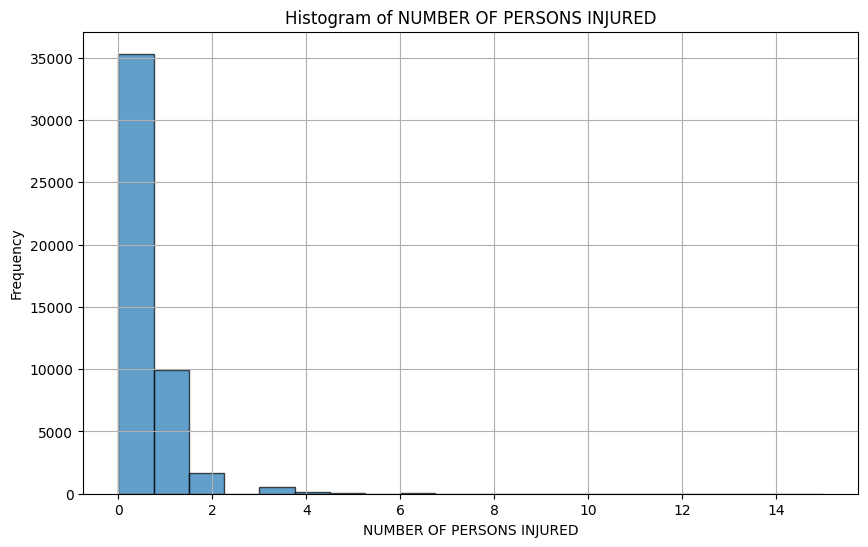

In [ ]:
# Your code here
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame

column_of_interest = 'NUMBER OF PERSONS INJURED'

# Plot a histogram of the selected column
plt.figure(figsize=(10, 6))
plt.hist(data[column_of_interest], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {column_of_interest}')
plt.xlabel(column_of_interest)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


3) Plot a scatter plot of two columns that you find interesting in the data frame. (Hint: Recall in *matplotlib.pyplot* there is the *.scatter* method)

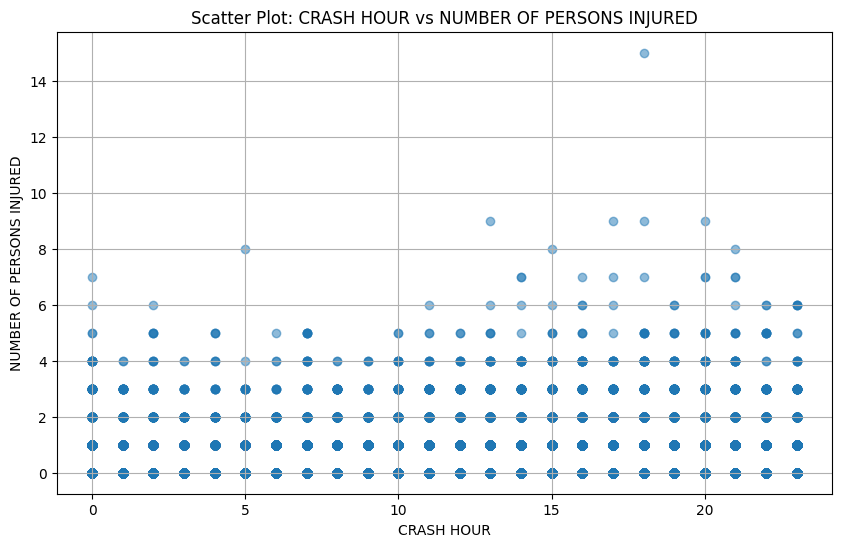

In [ ]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

x_column = 'CRASH HOUR'
y_column = 'NUMBER OF PERSONS INJURED'

# Plot a scatter plot of the selected columns
plt.figure(figsize=(10, 6))
plt.scatter(data[x_column], data[y_column], alpha=0.5)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()


<ipython-input-28-aa89302bd8b4>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_original.corr()


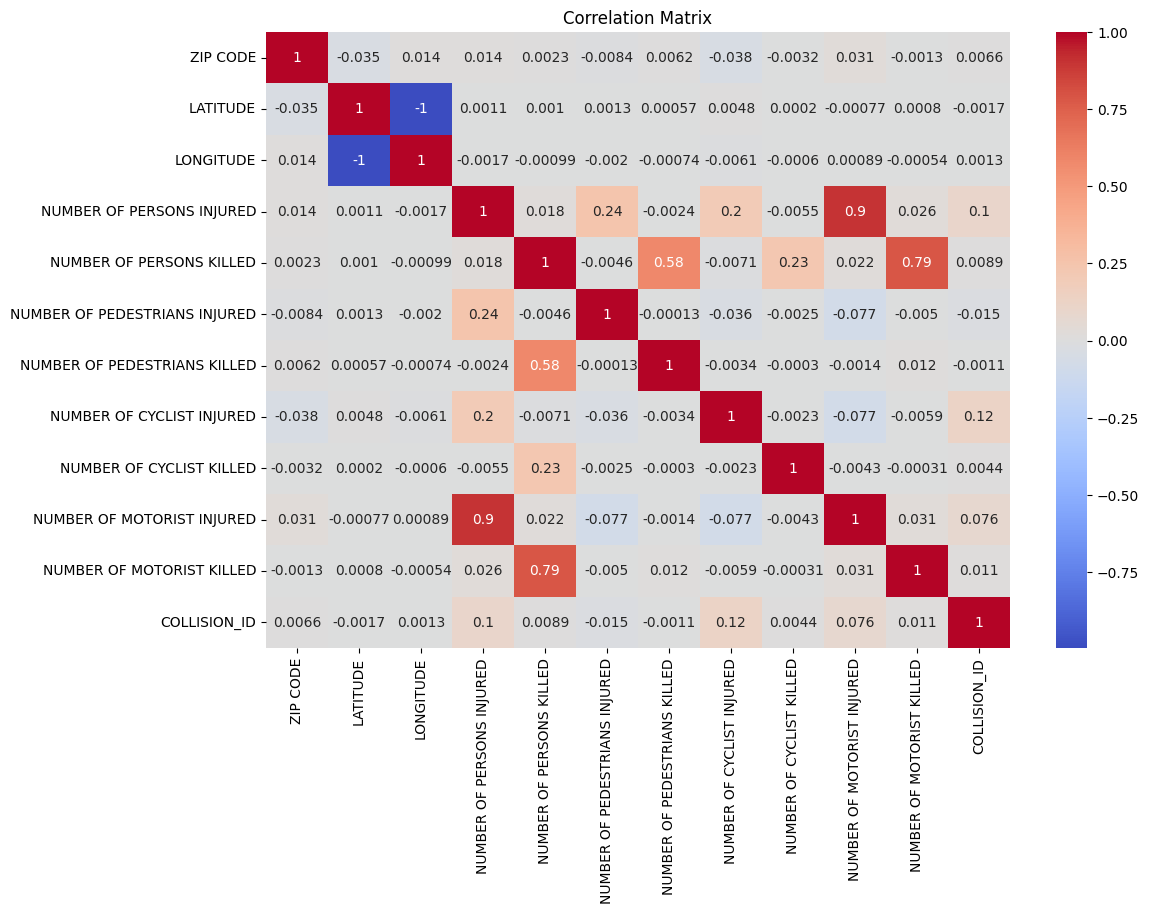

In [ ]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
data_original = pd.read_csv('/content/NYC-Accidents-2020.csv')

# Compute the correlation matrix
correlation_matrix = data_original.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,40.892100,-73.833760,0,2,15,8,2,1,0,0,0,0
1,40.690500,-73.919914,2,2,21,8,2,0,1,0,0,0
3,40.824720,-73.892960,0,4,0,8,4,1,0,0,0,0
4,40.649890,-73.933890,0,2,17,8,2,0,1,0,0,0
6,40.825226,-73.887780,0,1,19,8,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74876,40.826810,-73.896510,0,1,15,1,1,1,0,0,0,0
74877,40.582935,-73.959210,0,3,8,1,3,0,1,0,0,0
74878,40.848553,-73.830055,0,2,11,1,2,1,0,0,0,0
74879,40.753624,-73.969440,0,2,1,1,2,0,0,1,0,0


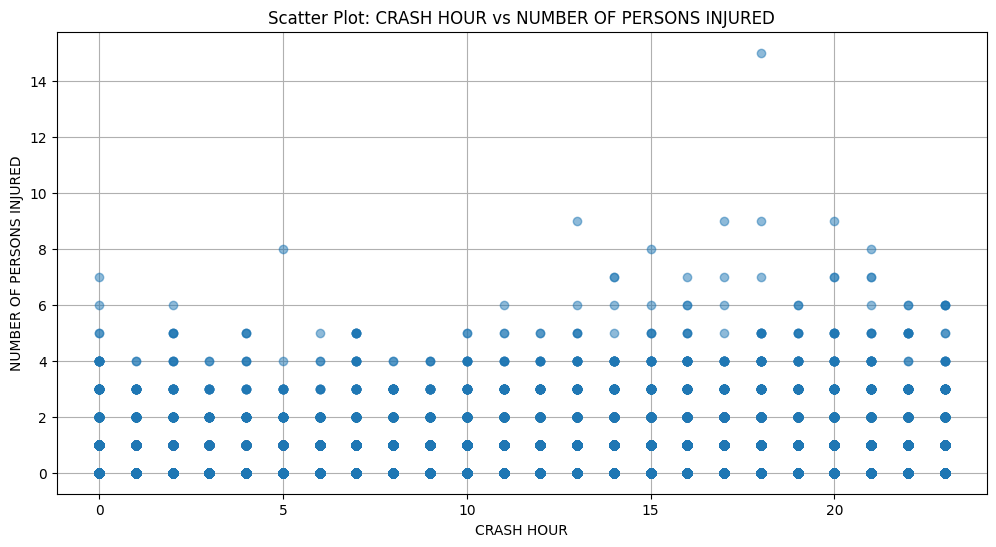

In [ ]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

x_column = 'CRASH HOUR'
y_column = 'NUMBER OF PERSONS INJURED'

# Plot a scatter plot of the selected columns
plt.figure(figsize=(12, 6))
plt.scatter(data[x_column], data[y_column], alpha = 0.5)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.gca().set_axisbelow(True)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()


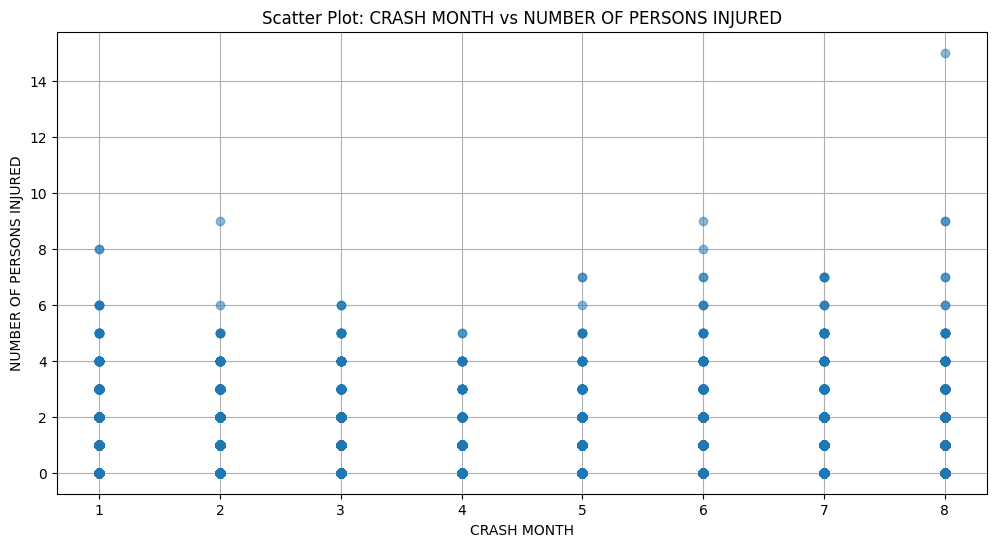

In [ ]:
x_column = 'CRASH MONTH'

plt.figure(figsize=(12, 6))
plt.scatter(data[x_column], data[y_column], alpha = 0.5)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.gca().set_axisbelow(True)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

In [ ]:
data_filtered = data_filtered = data[data['LONGITUDE'] != 0]
data_filtered = data_filtered = data[data['LATITUDE'] != 0]

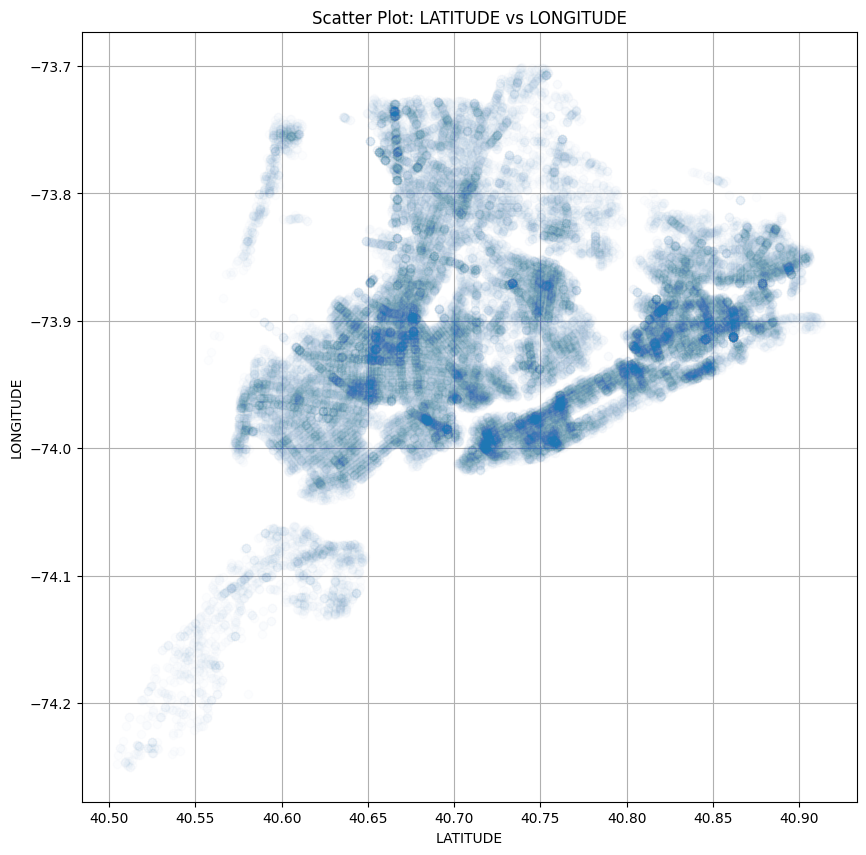

In [ ]:
y_column = 'LONGITUDE'
x_column = 'LATITUDE'

plt.figure(figsize=(10, 10))
plt.scatter(data_filtered[x_column], data_filtered[y_column], alpha = 0.01)
plt.title(f'Scatter Plot: {x_column} vs {y_column}')
plt.gca().set_axisbelow(True)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

<Axes: >

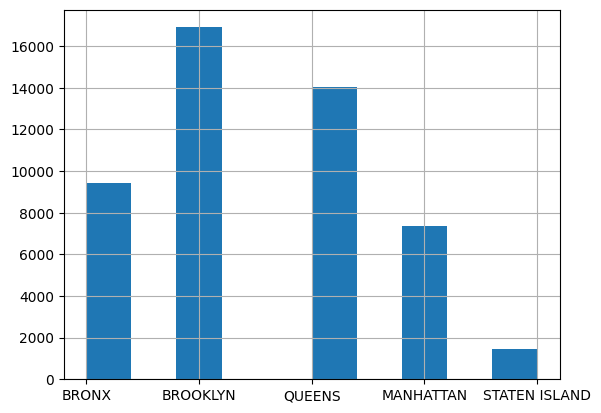

In [ ]:
data_original['BOROUGH'].hist()

<Axes: >

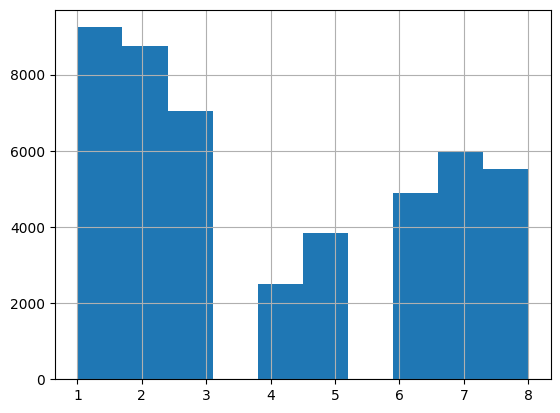

In [ ]:
data['CRASH MONTH'].hist()

<Axes: >

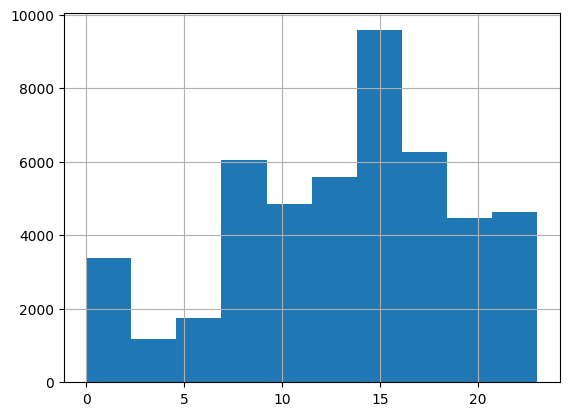

In [ ]:
data['CRASH HOUR'].hist()

In [ ]:
data

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,40.892100,-73.833760,0,2,15,8,2,1,0,0,0,0
1,40.690500,-73.919914,2,2,21,8,2,0,1,0,0,0
3,40.824720,-73.892960,0,4,0,8,4,1,0,0,0,0
4,40.649890,-73.933890,0,2,17,8,2,0,1,0,0,0
6,40.825226,-73.887780,0,1,19,8,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74876,40.826810,-73.896510,0,1,15,1,1,1,0,0,0,0
74877,40.582935,-73.959210,0,3,8,1,3,0,1,0,0,0
74878,40.848553,-73.830055,0,2,11,1,2,1,0,0,0,0
74879,40.753624,-73.969440,0,2,1,1,2,0,0,1,0,0


In [ ]:
data_original

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74876,2020-01-01,15:13:00,BRONX,10459.0,40.826810,-73.896510,POINT (-73.89651 40.82681),NaN,NaN,1122 INTERVALE AVENUE,...,NaN,NaN,NaN,NaN,4268088,Sedan,NaN,NaN,NaN,NaN
74877,2020-01-01,08:00:00,BROOKLYN,11235.0,40.582935,-73.959210,POINT (-73.95921 40.582935),NaN,NaN,3401 GUIDER AVENUE,...,Unspecified,Unspecified,NaN,NaN,4267756,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
74878,2020-01-01,11:36:00,BRONX,10461.0,40.848553,-73.830055,POINT (-73.830055 40.848553),NaN,NaN,1810 MAHAN AVENUE,...,Unspecified,NaN,NaN,NaN,4269230,Sedan,Pick-up Truck,NaN,NaN,NaN
74879,2020-01-01,01:45:00,MANHATTAN,10017.0,40.753624,-73.969440,POINT (-73.96944 40.753624),EAST 48 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4267482,Sedan,Taxi,NaN,NaN,NaN


## Baseline Model

Linear regression model as a baseline model.

In [ ]:
data

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,40.892100,-73.833760,0,2,15,8,2,1,0,0,0,0
1,40.690500,-73.919914,2,2,21,8,2,0,1,0,0,0
3,40.824720,-73.892960,0,4,0,8,4,1,0,0,0,0
4,40.649890,-73.933890,0,2,17,8,2,0,1,0,0,0
6,40.825226,-73.887780,0,1,19,8,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74876,40.826810,-73.896510,0,1,15,1,1,1,0,0,0,0
74877,40.582935,-73.959210,0,3,8,1,3,0,1,0,0,0
74878,40.848553,-73.830055,0,2,11,1,2,1,0,0,0,0
74879,40.753624,-73.969440,0,2,1,1,2,0,0,1,0,0


In [ ]:
X_train

,LATITUDE,LONGITUDE,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
57085,40.597270,-73.998680,1,14,2,2,0,1,0,0,0
57856,40.598465,-73.760400,1,10,2,2,0,0,0,1,0
21005,40.572070,-73.997925,2,14,6,2,0,1,0,0,0
15544,40.714546,-73.822660,1,19,7,1,0,0,0,1,0
45836,40.742256,-73.977680,1,22,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
33473,40.643784,-73.902180,2,16,4,2,0,1,0,0,0
72087,40.746002,-73.994270,2,8,1,2,0,0,1,0,0
66918,40.701653,-73.892746,2,13,1,2,0,0,0,1,0
68407,40.856045,-73.855675,2,8,1,2,1,0,0,0,0


In [ ]:
X_test

,LATITUDE,LONGITUDE,NUMBER VEHI,CRASH HOUR,CRASH MONTH,NUMBER CONT,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
58425,40.853813,-73.907340,2,11,2,2,1,0,0,0,0
38528,40.818740,-73.942024,2,17,3,2,0,0,1,0,0
70107,40.692654,-73.769470,2,7,1,2,0,0,0,1,0
42272,40.832360,-73.827680,2,12,3,2,1,0,0,0,0
22141,40.822613,-73.887060,3,14,6,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30563,40.679280,-73.860470,2,6,5,2,0,0,0,1,0
129,40.737694,-73.882240,2,20,8,2,0,0,0,1,0
73483,40.549496,-74.181244,2,18,1,2,0,0,0,0,1
44986,40.685420,-74.002510,2,14,3,2,0,1,0,0,0


In [ ]:
# simple model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)







Mean Squared Error: 0.4543642330749399
R-squared: 0.0216269951132243


## Improved Model

Neural network

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import tensorflow as tf

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test),  batch_size=512)


predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)



In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend(["Train MSE", "Test MSE"])

In [ ]:
plt.figure(figsize=(16, 6))
plot_graphs(history, 'loss')

## Tuning

Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.” Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to create the model
def create_model(activation='relu', dropout_rate=0.5, hidden_units=256):
    model = Sequential([
        Dense(1024, activation=activation),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(512, activation=activation),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(hidden_units, activation=activation),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


model = KerasRegressor(build_fn=create_model, verbose=0)


param_grid = {
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'hidden_units': [128, 256, 512]
}


grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)


grid_result = grid.fit(X_train_scaled, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


best_model = grid_result.best_estimator_.model


predictions = best_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


<ipython-input-47-7b6a4196e3e8>:36: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END activation=relu, dropout_rate=0.3, hidden_units=128; total time=  15.2s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=128; total time=  23.7s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=128; total time=  24.0s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=256; total time=  23.8s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=256; total time=  24.4s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=256; total time=  53.1s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=512; total time=  25.4s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=512; total time=  25.3s
[CV] END activation=relu, dropout_rate=0.3, hidden_units=512; total time=  25.3s
[CV] END activation=relu, dropout_rate=0.5, hidden_units=128; total time=  14.5s
[CV] END activation=relu, dropout_rate=0.5, hidden_units=128; total time=  14.0s
[CV] END activation=relu, dropout_rate=0.5, hidd